In [1]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/erwan/.local/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [3]:
side_size = 508
print('system image data format:', K.image_data_format())
input_img = Input(shape=(side_size, side_size, 3))  # adapt this if using `channels_first` image data format
print('image shape', input_img.shape)

system image data format: channels_last
image shape (?, 508, 508, 3)


In [82]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional NOT

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 508, 508, 3)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 508, 508, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 254, 254, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 127, 127, 32)      18464     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 64, 64, 32)        0         
__________

In [6]:
batch_size = 16

train_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    'impress_dataset',
    target_size=(side_size, side_size),
    batch_size=batch_size,
    class_mode='input')

Found 999 images belonging to 1 classes.


In [84]:
epochs = 50
autoencoder.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator) // batch_size,
    epochs=epochs)

Epoch 1/50
3/3 [==============================] - 5s 2s/step - loss: -695.7740
Epoch 2/50
3/3 [==============================] - 4s 1s/step - loss: -1994.6147
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: -1869.8408
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: -1806.6815
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: -1924.6737
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: -1926.8390
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: -1988.0661
Epoch 8/50
3/3 [==============================] - 4s 1s/step - loss: -1881.1507
Epoch 9/50
3/3 [==============================] - 4s 1s/step - loss: -1789.1069
Epoch 10/50
3/3 [==============================] - 4s 1s/step - loss: -1839.9385
Epoch 11/50
3/3 [==============================] - 4s 1s/step - loss: -1939.3167
Epoch 12/50
3/3 [==============================] - 4s 1s/step - loss: -1967.0987
Epoch 13/50
3/3 [=====================

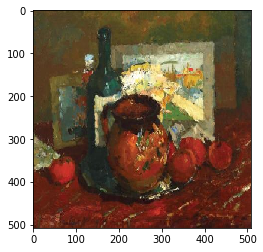

In [85]:
plt.imshow(train_generator[0][0][0].astype(int))

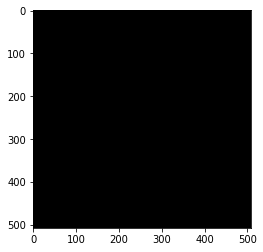

In [87]:
plt.imshow(255 - (autoencoder.predict(train_generator[0][0])*255).astype(int)[0])

In [89]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional NOT

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder2 = Model(input_img, decoded)
autoencoder2.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 508, 508, 3)       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 508, 508, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 254, 254, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 127, 127, 64)      36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 64, 64, 64)        0         
__________

In [90]:
batch_size = 16

train_datagen = ImageDataGenerator()

train_generator2 = train_datagen.flow_from_directory(
    'impress_dataset',
    target_size=(side_size, side_size),
    batch_size=batch_size,
    class_mode='input')

epochs = 50
autoencoder2.fit_generator(
    train_generator2,
    steps_per_epoch=len(train_generator) // batch_size,
    epochs=epochs)

Found 999 images belonging to 1 classes.
Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: -1199.9956
Epoch 2/50
3/3 [==============================] - 4s 1s/step - loss: -1962.7722
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: -1956.5663
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: -1844.3760
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: -2108.3394
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: -1877.2966
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: -1902.6671
Epoch 8/50
3/3 [==============================] - 4s 1s/step - loss: -1818.8499
Epoch 9/50
3/3 [==============================] - 4s 1s/step - loss: -2003.3216
Epoch 10/50
3/3 [==============================] - 4s 1s/step - loss: -2065.0906
Epoch 11/50
3/3 [==============================] - 4s 1s/step - loss: -1925.7457
Epoch 12/50
3/3 [==============================] - 4s 1s/step - loss: -1858.2

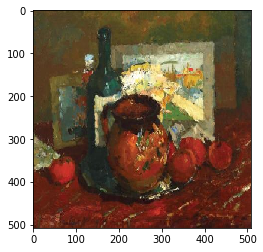

In [92]:
plt.imshow(train_generator[0][0][0].astype(int))

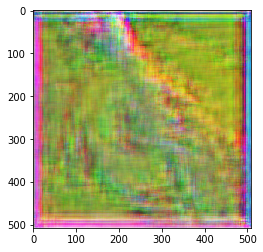

In [120]:
plt.imshow(255-(autoencoder.predict(train_generator[0][0])*255).astype(int)[0])

In [4]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional NOT

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='linear', padding='same')(x)

autoencoder3 = Model(input_img, decoded)
autoencoder3.compile(optimizer='adadelta', loss='mae')
autoencoder3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 508, 508, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 508, 508, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 254, 254, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 127, 127, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
__________

In [ ]:
batch_size = 16

train_datagen = ImageDataGenerator()

train_generator3 = train_datagen.flow_from_directory(
    'impress_dataset',
    target_size=(side_size, side_size),
    batch_size=batch_size,
    class_mode='input')

epochs = 50
autoencoder3.fit_generator(
    train_generator3,
    steps_per_epoch=len(train_generator),
    epochs=epochs)

Found 999 images belonging to 1 classes.
Epoch 1/50
63/63 [==============================] - 80s 1s/step - loss: 25.3699
Epoch 2/50
63/63 [==============================] - 80s 1s/step - loss: 23.7940
Epoch 3/50
63/63 [==============================] - 80s 1s/step - loss: 24.9112
Epoch 4/50
63/63 [==============================] - 80s 1s/step - loss: 24.2657
Epoch 5/50
63/63 [==============================] - 80s 1s/step - loss: 25.1981
Epoch 6/50
63/63 [==============================] - 80s 1s/step - loss: 23.9113
Epoch 7/50
63/63 [==============================] - 80s 1s/step - loss: 24.5463
Epoch 8/50
19/63 [========>.....................] - ETA: 56s - loss: 22.8840

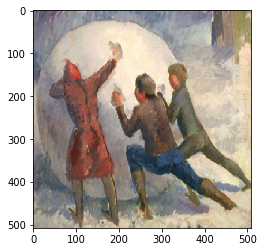

In [96]:
plt.imshow(train_generator2[0][0][0].astype(int))

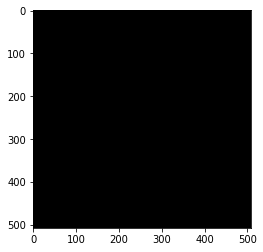

In [97]:
plt.imshow(255 - (autoencoder2.predict(train_generator[0][0])*255).astype(int)[0])

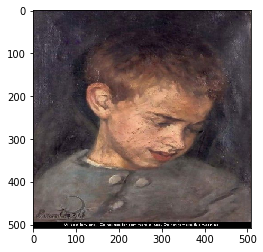

In [98]:
plt.imshow(train_generator3[0][0][0].astype(int))

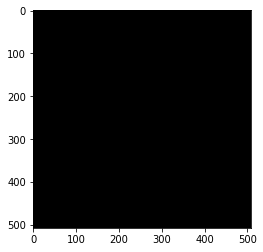

In [99]:
plt.imshow(255 - (autoencoder3.predict(train_generator[0][0])*255).astype(int)[0])

In [103]:
autoencoder.save_weights('not_too_bad.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


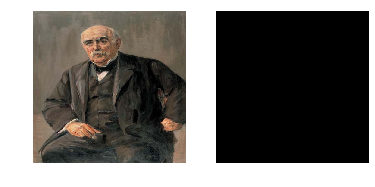

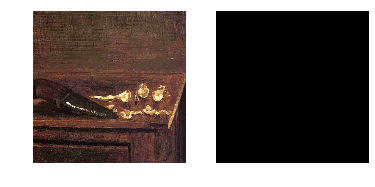

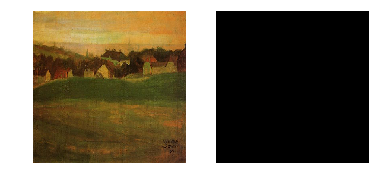

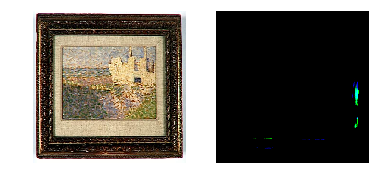

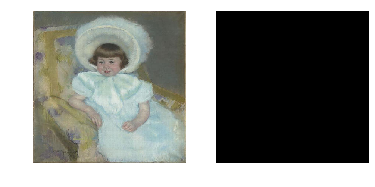

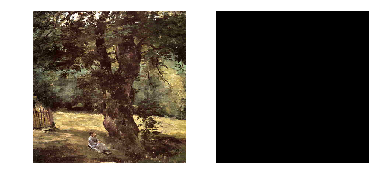

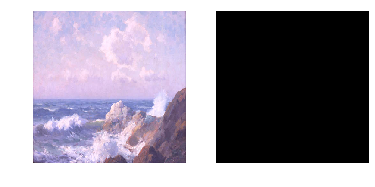

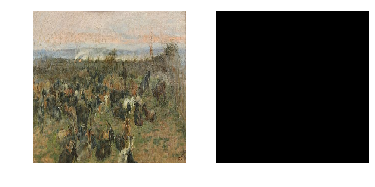

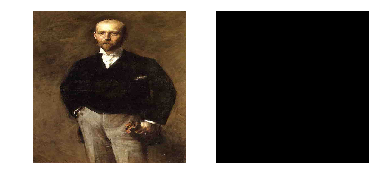

In [9]:
k = 1
for image in train_generator3:
    k += 1
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(image[0][0].astype(int))
    axarr[0].axis('off')
    axarr[1].imshow(255- (autoencoder3.predict(image[0])*255).astype(int)[0])
    axarr[1].axis('off')
    if k == 10:
        break